In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler

In [2]:
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('heartdisease.csv')

In [4]:
with open("heartdisease.names") as df_names:
    print(df_names.read())

Publication Request: 
   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
   This file describes the contents of the heart-disease directory.

   This directory contains 4 databases concerning heart disease diagnosis.
   All attributes are numeric-valued.  The data was collected from the
   four following locations:

     1. Cleveland Clinic Foundation (cleveland.data)
     2. Hungarian Institute of Cardiology, Budapest (hungarian.data)
     3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)
     4. University Hospital, Zurich, Switzerland (switzerland.data)

   Each database has the same instance format.  While the databases have 76
   raw attributes, only 14 of them are actually used.  Thus I've taken the
   liberty of making 2 copies of each database: one with all the attributes
   and 1 with the 14 attributes actually used in past experiments.

   The authors of the databases have requested:

      ...that any publications resulting from the use of th

In [5]:
df

,63,1,1.1,145,233,1.2,2,150,0,2.3,3,0.1,6,0.2
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
298,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
299,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
300,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [6]:
df.shape

(302, 14)

In [8]:
column_s = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [9]:
df.columns = column_s

In [10]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
298,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
299,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
300,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [11]:
df = df.fillna(0)

In [12]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.099925,0.112326,0.283257,0.210120,0.112245,0.146142,-0.394448,0.094065,0.201083,0.156199,0.368415,0.126549,0.225809
sex,-0.099925,1.000000,0.015342,-0.066292,-0.199492,0.042863,0.019386,-0.048740,0.148019,0.099976,0.032671,0.087806,0.377223,0.226601
cp,0.112326,0.015342,1.000000,-0.030717,0.070950,-0.022524,0.075854,-0.337136,0.382394,0.212589,0.171926,0.229945,0.261466,0.405182
trestbps,0.283257,-0.066292,-0.030717,1.000000,0.130924,0.171127,0.144395,-0.045437,0.066627,0.186987,0.112752,0.099490,0.132879,0.159978
chol,0.210120,-0.199492,0.070950,0.130924,1.000000,0.012058,0.172249,-0.003417,0.060755,0.047617,-0.002085,0.123220,0.025790,0.070315
fbs,0.112245,0.042863,-0.022524,0.171127,0.012058,1.000000,0.062202,-0.008067,0.031514,-0.002907,0.042630,0.147936,0.048883,0.065937
restecg,0.146142,0.019386,0.075854,0.144395,0.172249,0.062202,1.000000,-0.083591,0.087432,0.110879,0.127603,0.134486,0.021656,0.186769
thalach,-0.394448,-0.048740,-0.337136,-0.045437,-0.003417,-0.008067,-0.083591,1.000000,-0.378368,-0.343821,-0.389078,-0.265881,-0.263611,-0.415399
exang,0.094065,0.148019,0.382394,0.066627,0.060755,0.031514,0.087432,-0.378368,1.000000,0.291536,0.265491,0.144385,0.318139,0.395996
oldpeak,0.201083,0.099976,0.212589,0.186987,0.047617,-0.002907,0.110879,-0.343821,0.291536,1.000000,0.575415,0.304478,0.339953,0.508330


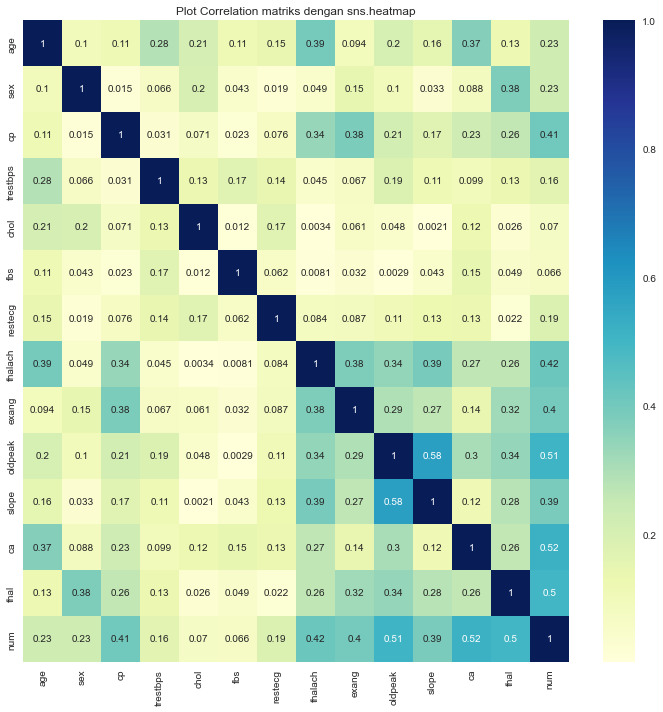

In [13]:
fig = plt.subplots(figsize=(10,10))
sns.heatmap(abs(df.corr()), annot=True, cmap="YlGnBu")
plt.title('Plot Correlation matriks dengan sns.heatmap')
plt.tight_layout()
plt.show()

In [170]:
def one_above(x):
    if x >= 1:
        return 1
    if x == 0:
        return 0
df['num'] = df['num'].apply(lambda x: one_above(x))
df['num'].value_counts()

0    163
1    139
Name: num, dtype: int64

In [171]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
298,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
299,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
300,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [172]:
min_max_scaler = MinMaxScaler()
columns = ['age','cp', 'trestbps','chol','restecg','thalach','oldpeak','slope','ca','thal']
for i in range(len(columns)):
    df[columns[i]] = min_max_scaler.fit_transform(df[[columns[i]]])

In [173]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.791667,1,1.000000,0.622642,0.365297,0,1.0,0.282443,1,0.241935,0.5,1.000000,0.428571,1
1,0.791667,1,1.000000,0.245283,0.235160,0,1.0,0.442748,1,0.419355,0.5,0.666667,1.000000,1
2,0.166667,1,0.666667,0.339623,0.283105,0,0.0,0.885496,0,0.564516,1.0,0.000000,0.428571,0
3,0.250000,0,0.333333,0.339623,0.178082,0,1.0,0.770992,0,0.225806,0.0,0.000000,0.428571,0
4,0.562500,1,0.333333,0.245283,0.251142,0,0.0,0.816794,0,0.129032,0.0,0.000000,0.428571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.333333,1,0.000000,0.150943,0.315068,0,0.0,0.465649,0,0.193548,0.5,0.000000,1.000000,1
298,0.812500,1,1.000000,0.471698,0.152968,1,0.0,0.534351,0,0.548387,0.5,0.666667,1.000000,1
299,0.583333,1,1.000000,0.339623,0.011416,0,0.0,0.335878,1,0.193548,0.5,0.333333,1.000000,1
300,0.583333,0,0.333333,0.339623,0.251142,0,1.0,0.786260,0,0.000000,0.5,0.333333,0.428571,1


In [174]:
fitur = len(df.columns) - 1
print(fitur)
features = df.values[:,:fitur]
# df.iloc[:,fitur:]
labels = df.values[:,fitur:]

13


In [175]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=20)
print(f'Ukuran dari X_train : {X_train.shape}')
print(f'Ukuran dari X_train : {y_train.shape}')
print(f'Ukuran dari X_train : {X_test.shape}')
print(f'Ukuran dari X_train : {y_test.shape}')

Ukuran dari X_train : (241, 13)
Ukuran dari X_train : (241, 1)
Ukuran dari X_train : (61, 13)
Ukuran dari X_train : (61, 1)


In [176]:
model = Sequential()
model.add(Dense(12, input_dim=fitur, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [177]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 12)                168       
                                                                 
 dense_25 (Dense)            (None, 12)                156       
                                                                 
 dense_26 (Dense)            (None, 1)                 13        
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [178]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [179]:
model.fit(X_train, y_train, epochs = 300, batch_size=len(X_train))


Epoch 1/300
1/1 [==============================] - 1s 863ms/step - loss: 0.6953 - accuracy: 0.5270
Epoch 2/300
1/1 [==============================] - 0s 15ms/step - loss: 0.6941 - accuracy: 0.5436
Epoch 3/300
1/1 [==============================] - 0s 12ms/step - loss: 0.6930 - accuracy: 0.5560
Epoch 4/300
1/1 [==============================] - 0s 12ms/step - loss: 0.6919 - accuracy: 0.5602
Epoch 5/300
1/1 [==============================] - 0s 29ms/step - loss: 0.6908 - accuracy: 0.5602
Epoch 6/300
1/1 [==============================] - 0s 11ms/step - loss: 0.6897 - accuracy: 0.5726
Epoch 7/300
1/1 [==============================] - 0s 9ms/step - loss: 0.6886 - accuracy: 0.5851
Epoch 8/300
1/1 [==============================] - 0s 9ms/step - loss: 0.6875 - accuracy: 0.5892
Epoch 9/300
1/1 [==============================] - 0s 13ms/step - loss: 0.6865 - accuracy: 0.5975
Epoch 10/300
1/1 [==============================] - 0s 73ms/step - loss: 0.6855 - accuracy: 0.6100
Epoch 11/300
1/1 [==

1/1 [==============================] - 0s 11ms/step - loss: 0.4103 - accuracy: 0.8216
Epoch 167/300
1/1 [==============================] - 0s 8ms/step - loss: 0.4092 - accuracy: 0.8216
Epoch 168/300
1/1 [==============================] - 0s 8ms/step - loss: 0.4081 - accuracy: 0.8216
Epoch 169/300
1/1 [==============================] - 0s 13ms/step - loss: 0.4070 - accuracy: 0.8257
Epoch 170/300
1/1 [==============================] - 0s 7ms/step - loss: 0.4060 - accuracy: 0.8299
Epoch 171/300
1/1 [==============================] - 0s 8ms/step - loss: 0.4049 - accuracy: 0.8299
Epoch 172/300
1/1 [==============================] - 0s 9ms/step - loss: 0.4038 - accuracy: 0.8299
Epoch 173/300
1/1 [==============================] - 0s 9ms/step - loss: 0.4028 - accuracy: 0.8299
Epoch 174/300
1/1 [==============================] - 0s 9ms/step - loss: 0.4018 - accuracy: 0.8257
Epoch 175/300
1/1 [==============================] - 0s 8ms/step - loss: 0.4007 - accuracy: 0.8257
Epoch 176/300
1/1 [===

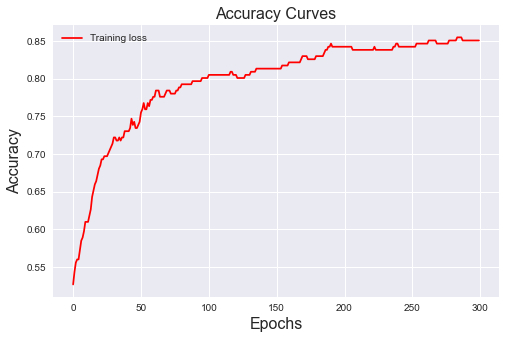

In [180]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], 'r')
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [181]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 91.80


# Kesimpulan

Dengan menggunakan algorithm Sequential() dan menggunakan activation functio untuk input layer dan hidden layer yaitu relu, dan untuk output layer menggunakan sigmoid. Didapati accuracy dari training data yaitu 91.8